<a href="https://colab.research.google.com/github/ajadi473/machine_learning/blob/master/Skin_disease_classisication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd

# the fast ai library

from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
# import the warnings

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# https://drive.google.com/drive/folders/1y5EAU2kv41tsk7rLBqdpblPokJnxaE3l?usp=sharing

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd 'gdrive/My Drive/Colab Notebooks/Datasets/'

/content/gdrive/My Drive/Colab Notebooks/Datasets


In [ ]:
%ls

 BreakHis_DatasetBreak.zip   DSN19/            'Skin Classifier'/
 DatasetBreak.zip            HNG/               titanic/
 DatasetBreastSplitted.zip   nigerian_dishes/


In [ ]:
# atopic  = 'Atopic Dermatitis Photos'
# eczema = 'Eczema Photos'
# herpes_hpv = 'Herpes HPV and other STDs Photos'
# melanoma = 'Melanoma Skin Cancer Nevi and Moles'



In [ ]:

# fnames_1 = get_image_files(atopic)
# fnames_2 = get_image_files(atopic)


### The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

#### The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, ImageDataBunch.from_name_re gets the labels from the filenames using a regular expression.

In [ ]:
# fnames_1[:20]

In [ ]:

path_2 = Path('Skin Classifier')

In [ ]:
path_2.ls()

[PosixPath('Skin Classifier/test'),
 PosixPath('Skin Classifier/train'),
 PosixPath('Skin Classifier/SKIN'),
 PosixPath('Skin Classifier/models')]

In [ ]:


# PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg')
# pat = r'/([^/]+)_\d+.jpg$'

# PosixPath('Atopic Dermatitis Photos/KeratosisIMG007-GP3.jpg')
# pat = r'([^/]+).jpg$'

# unrecognized list values
# 05keratosisPilaris083004, 05DryCrackedHeels090803, 05IchthyosisVulgaris0216, 05hyperlinear070905, Img0053...
# recognized list values
# 05hyperLinearCrease042804,05Atopic1206047,IchthosisIMG010-GP3,IchthosisIMG032-GP3,8IMG006

np.random.seed(2)
pat = r'([^/]+).jpg$'

In [ ]:
np.random.seed(2)
# data = ImageDataBunch.from_folder(path, train="training", valid="validation",
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

data_eczema = ImageDataBunch.from_folder(path_2, train="train", valid="test",
        ds_tfms=get_transforms(max_zoom=1.05), size=225, num_workers=4)

data_eczema.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2895 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos
Path: Skin Classifier;

Valid: LabelList (669 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos,Herpes HPV and other STDs Photos
Path: Skin Classifier;

Test: None

In [ ]:
data_eczema.classes

['Atopic Dermatitis Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Melanoma Skin Cancer Nevi and Moles']

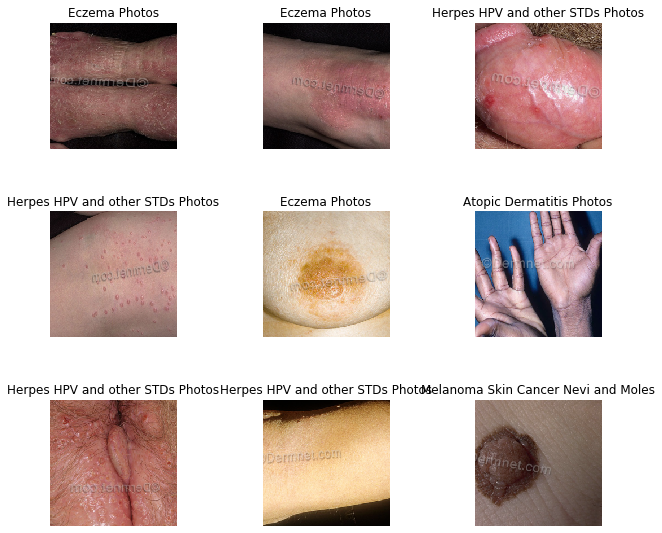

In [ ]:
data_eczema.show_batch(rows=3, figsize=(9,8))

In [ ]:
data_eczema.classes, data_eczema.c, len(data_eczema.train_ds), len(data_eczema.valid_ds)

(['Atopic Dermatitis Photos',
  'Eczema Photos',
  'Hair Loss Photos Alopecia and other Hair Diseases',
  'Herpes HPV and other STDs Photos',
  'Melanoma Skin Cancer Nevi and Moles'],
 5,
 2895,
 669)

## train dataset - 2895
## test dataset - 669
## classes - 5   
## total - 3,546

In [ ]:
learn = cnn_learner(data_eczema, models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 54.3MB/s]


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.740601,1.285936,0.345291,0.654709,33:04
1,1.254001,0.795843,0.291480,0.708520,31:32
2,0.896583,0.650429,0.242152,0.757848,32:29
3,0.727952,0.640524,0.242152,0.757848,33:13


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


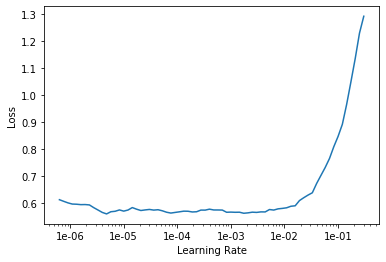

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.589966,0.659365,0.228700,0.771300,33:08
1,0.708988,0.783010,0.291480,0.708520,32:18
2,0.823337,0.864050,0.258595,0.741405,33:12
3,0.804076,0.685934,0.246637,0.753363,33:18
4,0.713293,0.751383,0.236173,0.763827,33:22
5,0.638926,0.631941,0.210762,0.789238,33:33
6,0.577859,0.588940,0.185351,0.814649,33:41
7,0.494078,0.527831,0.177877,0.822123,33:32
8,0.436126,0.541807,0.176383,0.823617,33:41
9,0.386743,0.530417,0.167414,0.832586,33:50


In [ ]:

learn.save('stage-1-80')

## Result

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_eczema.valid_ds)==len(losses)==len(idxs)

True

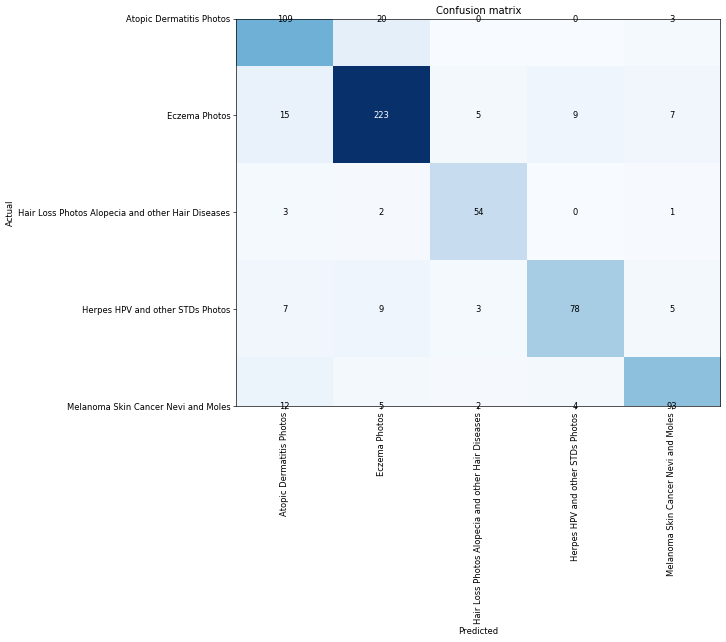

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


/usr/local/lib/python3.6/dist-packages/fastai/train.py:210: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


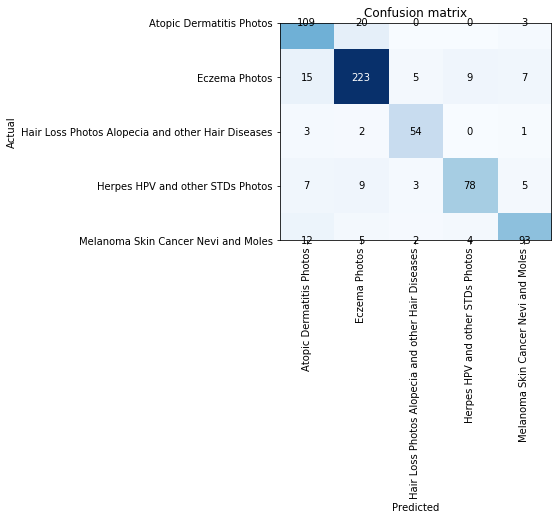

In [ ]:
interp.plot_confusion_matrix()

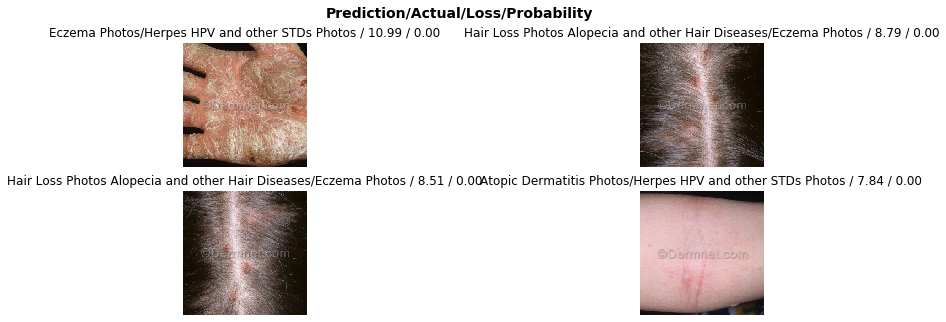

In [ ]:
interp.plot_top_losses(4, figsize=(15,5))

In [ ]:
learn.save('first')

In [ ]:

learn.show_results(rows=10, figsize=(12,15))